In [54]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [55]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [56]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhupi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhupi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
data=pd.read_csv(r"T:\AllDatasets\Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv")

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [59]:
data.dropna(inplace=True)

In [60]:
data.loc[data['Sentiment']<=3,'Sentiment'] = 0


data.loc[data['Sentiment']>3,'Sentiment'] = 1

In [61]:
stp_words=stopwords.words('english')
def clean_review(review): 
  cleanreview=" ".join(word for word in review.split() if word not in stp_words)
  return cleanreview 

data['Review']=data['Review'].apply(clean_review)

In [62]:
data.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


In [63]:
print(data['Sentiment'].value_counts())


Sentiment
0    15000
1     9999
Name: count, dtype: int64


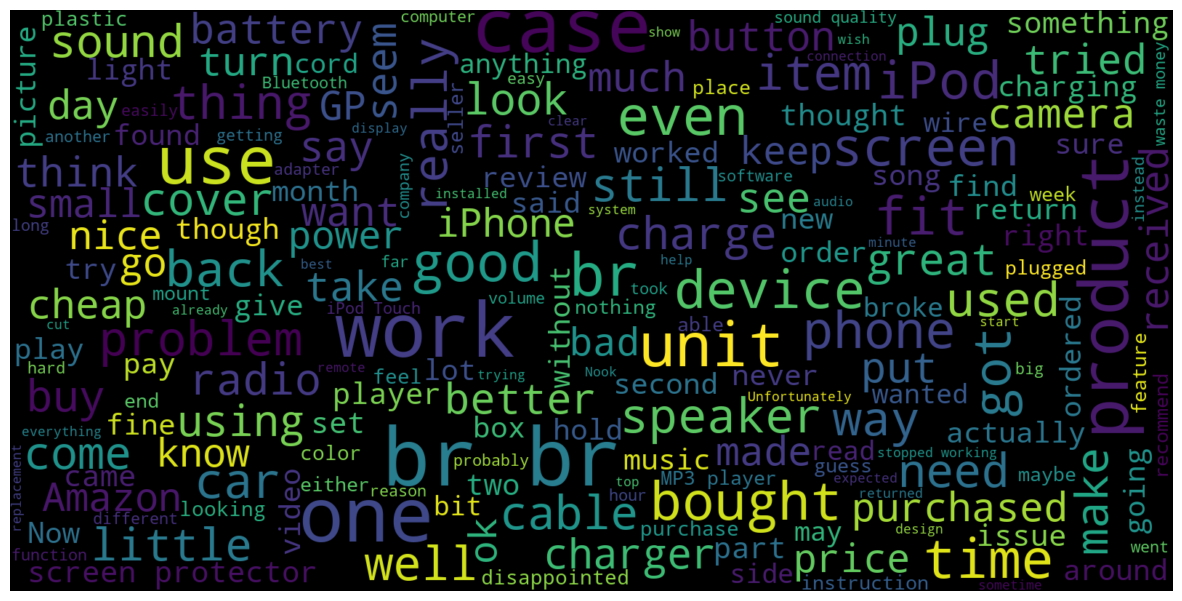

In [64]:
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

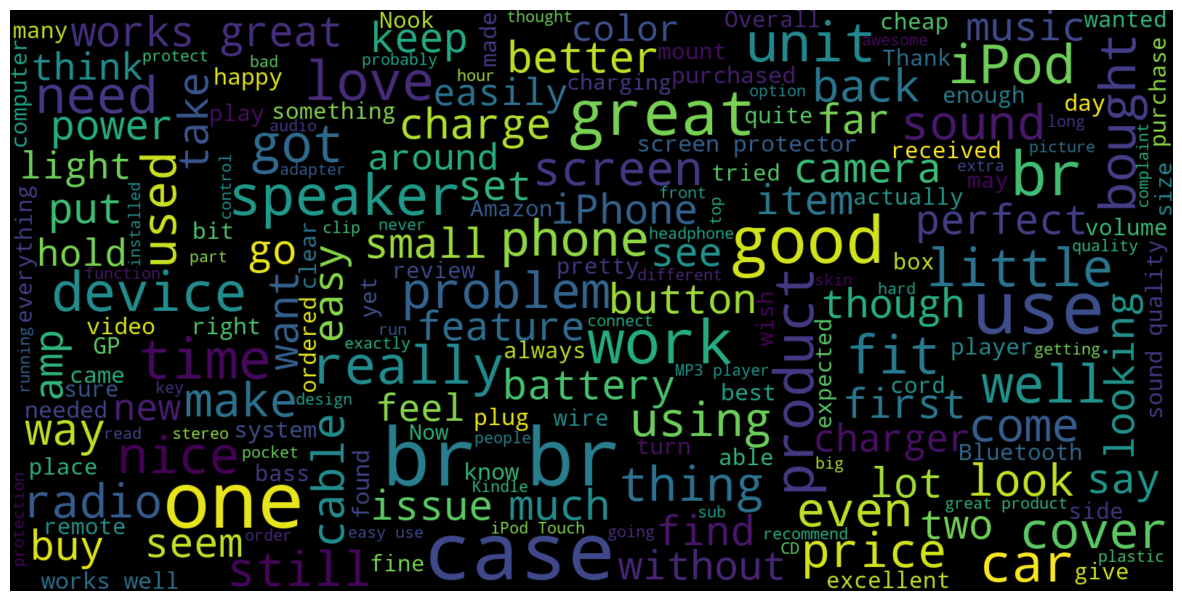

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure text is string and no missing data
filtered_reviews = data['Review'][data['Sentiment'] == 1].dropna().astype(str)
consolidated = ' '.join(filtered_reviews)

if consolidated.strip():
    wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No positive sentiment reviews found to generate WordCloud.")
